<div class="alert alert-success"><h1>Building a Convolutional Neural Network in Python using Keras</h1></div>

Convolutional Neural Networks (CNNs) are a powerful class of deep neural networks primarily used for processing image data. CNNs have proven extremely effective in image classification, object detection, and facial recognition tasks. In this tutorial, we'll build a CNN using Keras and TensorFlow to classify images from the CIFAR-10 dataset into 10 distinct categories.

## Learning Objectives
By the end of this tutorial, you will:
+ Understand the basics of CNNs and their architecture.
+ Learn how to preprocess image data for deep learning.
+ Build a simple CNN using Keras and TensorFlow.
+ Train and evaluate the CNN model.

## Prerequisites
Before we begin, ensure you have:

+ Basic knowledge of Python programming (variables, functions, loops).
+ Understanding of fundamental machine learning concepts.
+ Python environment (version 3.x) with `tensorflow`, `keras`, and `matplotlib` installed.

<div class="alert alert-info"><b>Note:</b> For further insights into deep learning and model building with Keras and TensorFlow, consider exploring the LinkedIn Learning course <b>"Deep Learning with Python: Foundations"</b>.</div>

<div class="alert alert-success"><h2>1. Import and Preprocess the Data</h2></div>

Let's start by importing the data and verifying that the shape is as expected.

In [1]:
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print('Training data shape:', train_images.shape)
print('Testing data shape:', test_images.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


The **CIFAR-10** dataset is a well-known benchmark dataset commonly used to evaluate the performance of computer vision models, particularly convolutional neural networks (CNNs). It consists of 60,000 color images, each of dimensions 32 x 32 pixels with 3 color channels (RGB), divided into:
+ 50,000 images for training.
+ 10,000 images for testing (evaluation).

Each image is assigned exactly one of ten distinct classes representing common objects - (0) Airplane, (1) Automobile, (2) Bird, (3) Cat, (4) Deer, (5) Dog, (6) Frog, (7) Horse, (8) Ship, and (9) Truck.

Let's preview the first 10 images in the training set to get a sense of what they look like.

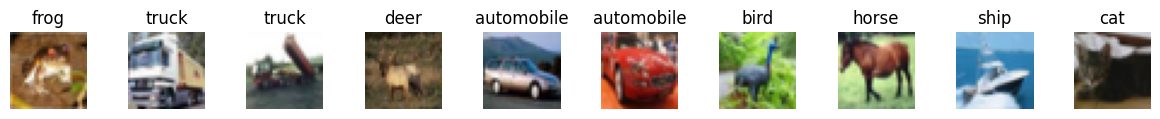

In [2]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(1, 10, figsize = (15, 1))
for i, ax in enumerate(axes):
    ax.imshow(train_images[i])
    ax.set_title(class_names[train_labels[i][0]])
    ax.axis('off')
plt.show()

As you can see, the images are very low resolution and somewhat difficult to make out. They are 32 x 32 pixels in dimension. They weren't necessarily designed to be viewed on a high-resolution screen. However, we can tell what each image is by looking at the label.

Pixel values in images range from 0 to 255. Deep learning models (such as CNNs) perform better when input values are scaled to a smaller range, typically between 0 and 1. To accommodate this, we convert the data type of the image pixels to float32 and normalize the values to fall within 0 and 1 by dividing them by 255.

In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

For labels, we'll use one-hot encoding. Each integer label (0-9) is converted to a binary vector with one "hot" (1) position indicating the class.

In [4]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

Now, `train_labels` and `test_labels` are matrices of shape (50000, 10) and (10000, 10), respectively.

<div class="alert alert-success"><h2>2. Define the Model Architecture</h2></div>

First, we create a Sequential model. This is a linear stack of layers that simplifies the construction of neural networks.

In [5]:
model = keras.Sequential()

Next, we define the input shape of our data. The CIFAR-10 images have dimensions of 32 pixels by 32 pixels, with 3 color channels (RGB).

In [6]:
model.add(keras.Input(shape = (32, 32, 3)))

We add a convolutional layer (Conv2D) with:
+ 32 filters: These filters detect various features (edges, textures, shapes) in the images.
+ Kernel size (3 x 3): Defines the size of the window moving across the image to extract features.
+ ReLU activation: Introduces non-linearity, allowing the CNN to learn more complex patterns.

In [7]:
from tensorflow.keras import layers

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

We add Batch Normalization to stabilize and speed up training by normalizing the layer inputs. This reduces internal covariate shift and allows the network to learn faster and more effectively.

In [8]:
model.add(layers.BatchNormalization())

We apply MaxPooling to reduce the spatial dimensions (width and height) of feature maps, summarizing the presence of features in patches of the image. Here, the pooling size of (2,2) halves the dimensions of the feature maps.

In [9]:
model.add(layers.MaxPooling2D(pool_size = (2,2)))

A Dropout layer randomly turns off neurons during training (here, with a probability of 25%). This reduces the risk of overfitting by preventing the network from overly relying on specific neurons.

In [10]:
model.add(layers.Dropout(rate = 0.25))

We add a second convolutional block, similar to the first, but this time with 64 filters, followed again by Batch Normalization, MaxPooling, and Dropout.

In [11]:
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(rate = 0.25))

We introduce a third convolutional block with 128 filters, also followed by Batch Normalization, MaxPooling, and Dropout.

In [12]:
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(rate = 0.25))

Before transitioning to the fully connected layers, we use a Flatten layer to reshape the three-dimensional feature maps into a one-dimensional vector.

In [13]:
model.add(layers.Flatten())

We add a fully connected Dense layer with 512 neurons and ReLU activation. This layer integrates and interprets features extracted by convolutional layers to make meaningful predictions.

In [14]:
model.add(layers.Dense(units = 512, activation = 'relu'))

Again, we apply Batch Normalization and Dropout to the fully connected layer to ensure stable training and reduce the risk of overfitting.

In [15]:
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate = 0.5))

Finally, we add an output layer with 10 neurons, corresponding to the ten classes in CIFAR-10. The softmax activation function converts the output into probabilities for each class, indicating the likelihood of the input image belonging to each of the 10 categories.

In [16]:
model.add(layers.Dense(units = 10, activation = 'softmax'))

Rather than adding each layer of the model one by one, we can also define the entire model at once as follows:

In [17]:
model = keras.Sequential([
    keras.Input(shape = (32, 32, 3)),

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(rate = 0.25),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(rate = 0.25),

    layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(rate = 0.25),

    layers.Flatten(),
    layers.Dense(units = 512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.5),
    layers.Dense(units = 10, activation = 'softmax')
])

<div class="alert alert-success"><h2>3. Compile and Train the Model</h2></div>

Before training, we compile the model by specifying the optimizer, loss function, and metrics. For multiclass classification, the `'categorical_crossentropy'` loss function is appropriate, and we include `'accuracy'` as a metric to gauge the percentage of correct predictions.

In [19]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

To train the model, we call the `fit()` method and specify the training data, training labels, number of epochs (the number of times the model will iterate over the entire training dataset), batch size (the number of images processed before the model is updated), and validation split (the fraction of the training data to use for validation).

In [21]:
history = model.fit(train_images, train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_split = 0.1)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.3129 - loss: 2.2950 - val_accuracy: 0.1756 - val_loss: 3.1871
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4903 - loss: 1.4286 - val_accuracy: 0.5606 - val_loss: 1.2351
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5611 - loss: 1.2379 - val_accuracy: 0.5810 - val_loss: 1.1851
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6048 - loss: 1.1157 - val_accuracy: 0.6242 - val_loss: 1.0592
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6300 - loss: 1.0373 - val_accuracy: 0.6250 - val_loss: 1.1081
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6505 - loss: 0.9755 - val_accuracy: 0.6644 - val_loss: 0.9883
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6730 - loss: 0.9263 - val_accuracy: 0.7090 - val_loss: 0.8411
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6838 - loss: 0.8911 - val_accuracy: 

The `history` object returned by `model.fit()` contains the training and validation accuracy metrics for each epoch. Plotting this data helps us understand the model's performance across epochs.

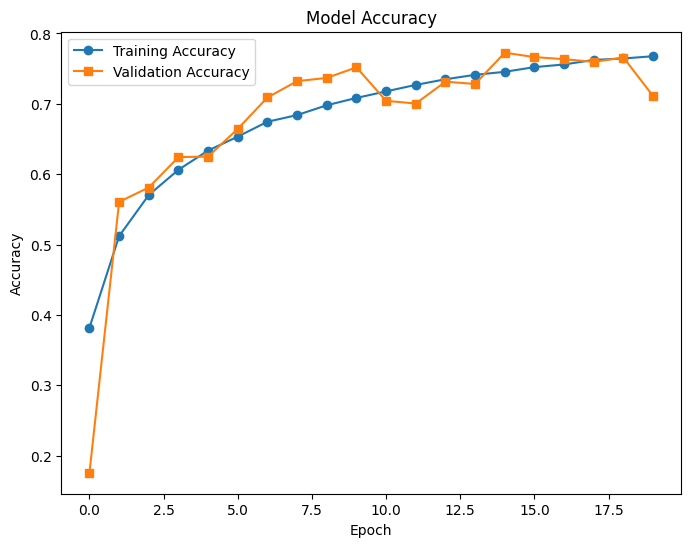

In [24]:
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', marker = 'o')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', marker = 's')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The chart shows that training accuracy consistently improves and eventually plateaus near approximately 80%. This indicates the model learns effectively from the training data. The validation accuracy has fluctuations but generally follows the training accuracy trend, indicating the model generalizes reasonably well.

The `history` object returned by `model.fit()` also contains the training and validation loss metrics for each epoch. Plotting this data is also informative.

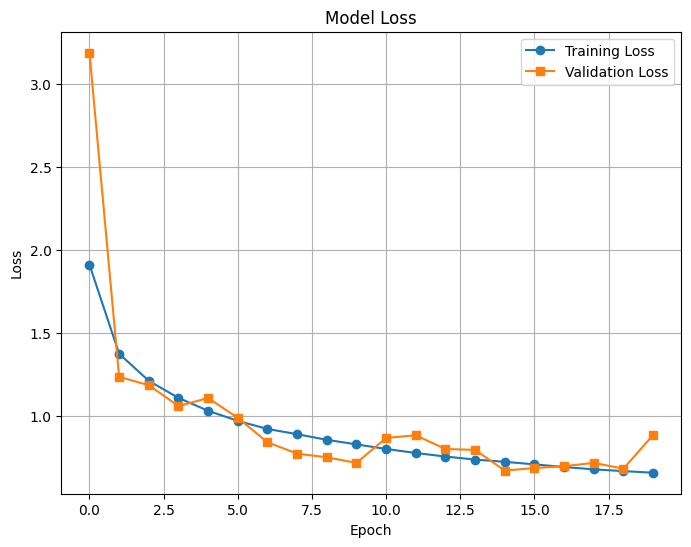

In [26]:
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'], label = 'Training Loss', marker = 'o')
plt.plot(history.history['val_loss'], label = 'Validation Loss', marker = 's')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

The chart shows that training loss consistently decreases, signaling that the model steadily becomes better at correctly predicting labels for the training data. Validation loss also generally decreases over epochs, but with notable fluctuations at earlier epochs. This initial instability could result from the model initially struggling with unseen data.

<div class="alert alert-success"><h2>4. Evaluate the Model</h2></div>

Finally, we can evaluate the model's accuracy against the test data.

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6992 - loss: 0.9167
Test accuracy: 0.6988000273704529


The accuracy score provides an objective measurement of our model’s generalization ability (i.e., how well it classifies images it has never seen before).